## Problem 1

In [54]:
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, LinearRegression

In [55]:
train_data = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/5/healthcareTrain.csv')
test_data = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/5/healthcareTest.csv')

features =  ["total_los", "num_op", "num_er", "num_ndc", "pre_total_cost", "pre_CCI"]
X = train_data[features]
y = train_data['pdc_80_flag']
X_test = test_data[features]
y_test = test_data['pdc_80_flag']

In [73]:
train_data.head()

,patIndex,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,...,brand_cost,ratio_G_total_cost,numofgen_post,numofbrand_post,generic_cost_post,brand_cost_post,ratio_G_total_cost_post,pdc_80_flag,drug_class,patient_key
0,2393,0.500000,0,0,2,0,3,2,2.333333,1.0,...,0.000000,1.000000,3,0,39.557654,0.0,1.0,0,*ANTIDIABETICS*,322512
1,2148,0.994444,0,0,3,0,17,5,26.500000,1.0,...,19.553557,0.929937,17,0,547.646290,0.0,1.0,1,*ANTIDIABETICS*,291191
2,1799,0.472222,0,0,3,0,3,1,3.000000,1.0,...,0.000000,1.000000,3,0,8.834483,0.0,1.0,0,*ANTIDIABETICS*,251767
3,636,0.166667,0,0,0,0,2,2,2.000000,1.0,...,243.805101,NaN,2,0,8.100969,0.0,1.0,0,*ANTIDIABETICS*,80678
4,114,0.944444,0,0,3,0,12,2,12.000000,1.0,...,0.000000,1.000000,12,0,50.324328,0.0,1.0,1,*ANTIDIABETICS*,16047


In [71]:
X

,total_los,num_op,num_er,num_ndc,pre_total_cost,pre_CCI
0,0,0,0,1,7.400208,0
1,0,6,0,10,861.698615,0
2,0,6,0,1,3359.293139,0
3,0,0,0,2,243.805101,0
4,0,2,0,1,925.519015,0
...,...,...,...,...,...,...
1373,0,9,0,0,1740.432713,0
1374,0,3,0,16,817.506305,2
1375,0,3,0,20,2889.207166,1
1376,0,8,0,19,4611.646736,1


In [74]:
y_test.head()

0    0
1    1
2    0
3    1
4    0
Name: pdc_80_flag, dtype: int64

In [58]:
k_range = range(31, 102, 2)

def generate_kfold_indices(n_samples, n_folds=10, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // n_folds
    kfold_indices = []
    for i in range(n_folds):
        val_start = i * fold_size
        val_end = (i + 1) * fold_size
        if i == n_folds - 1:
            val_end = n_samples
        val_indices = indices[val_start:val_end]
        train_indices = np.concatenate([indices[:val_start], indices[val_end:]])
        kfold_indices.append((train_indices, val_indices))  # Store the tuple
    return kfold_indices

In [59]:
def cross_validate_knn(X, y, k_range, kfold_indices):
    accuracies = []

    for k in k_range:
        k_accuracies = []
        for train_index, val_index in kfold_indices:  # Use the pre-generated indices
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            k_accuracies.append(accuracy)

        avg_accuracy = np.mean(k_accuracies)
        accuracies.append(avg_accuracy)

    best_k = k_range[np.argmax(accuracies)]
    best_accuracy = max(accuracies)

    return accuracies, best_k, best_accuracy

Best K: 59
Best Validation accuracy: 0.6059


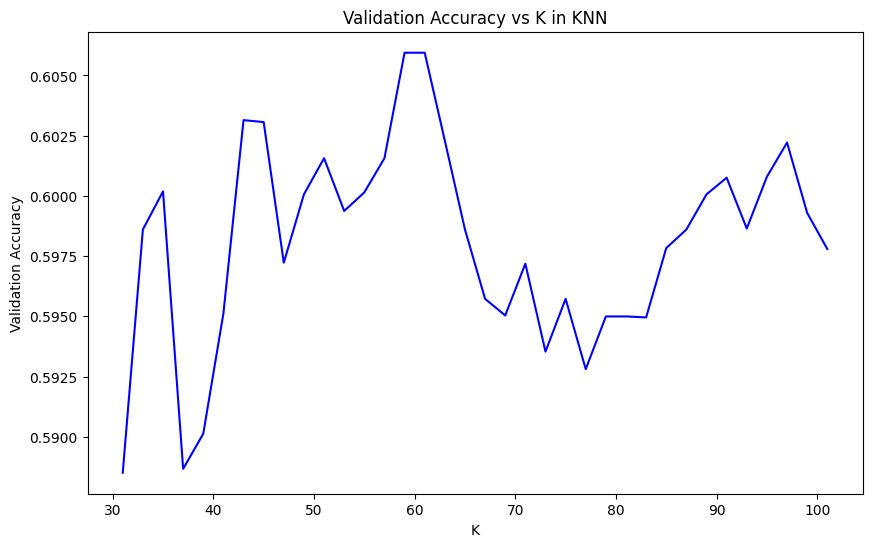

In [60]:
kfold_indices = generate_kfold_indices(len(X))

# Performing cross-validation
accuracies, best_k, best_accuracy = cross_validate_knn(X, y, k_range, kfold_indices)

print(f"Best K: {best_k}")
print(f"Best Validation accuracy: {best_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, 'b-')
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs K in KNN')
plt.show()

In [61]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X, y)

# Prediction on the test set
y_pred_test = final_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Test Accuracy with Best K={best_k}: {test_accuracy:.4f}")

#Comparing the validation and test error
print(f"Validation Accuracy: {best_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy with Best K=59: 0.5814
Validation Accuracy: 0.6059
Test Accuracy: 0.5814


The best value of K determined through 10-fold cross-validation was K = 59, achieving a validation accuracy of 60.59%. 

When evaluated on the test set using this optimal K, the test accuracy was 58.14%. 

This indicates that the model’s performance on unseen data closely aligns with the validation results, suggesting a well-generalized KNN classifier.

## Problem 2

In [62]:
def f(x):
    return np.sin(np.pi * x)

In [63]:
n_sim = 10000 
n_pts = 2      
x_g = np.linspace(-1, 1, 100)  
g_unr_all = np.zeros((n_sim, len(x_g)))
g_reg_all = np.zeros((n_sim, len(x_g)))

In [64]:
for i in range(n_sim):
    x_tr = np.random.uniform(-1, 1, size=(n_pts, 1)) 
    y_tr = f(x_tr).ravel()                          

    # Linear features: [x, 1]
    X_tr = np.hstack((x_tr, np.ones_like(x_tr)))    
    X_grid = np.vstack((x_g, np.ones_like(x_g))).T  

    # Unregularized Linear Regression
    m_unr = LinearRegression().fit(X_tr, y_tr)
    g_unr_all[i] = m_unr.predict(X_grid)

    # Ridge Regression (λ = 0.1)
    m_reg = Ridge(alpha=0.1, fit_intercept=False)
    m_reg.fit(X_tr, y_tr)
    g_reg_all[i] = m_reg.predict(X_grid)

g_unr_avg = np.mean(g_unr_all, axis=0)  
g_reg_avg = np.mean(g_reg_all, axis=0)  

In [65]:
print(" Average Hypothesis g(x) (Unregularized):")
g_unr_avg

 Average Hypothesis g(x) (Unregularized):


array([-0.78165931, -0.76582069, -0.74998207, -0.73414345, -0.71830483,
       -0.70246622, -0.6866276 , -0.67078898, -0.65495036, -0.63911174,
       -0.62327312, -0.6074345 , -0.59159589, -0.57575727, -0.55991865,
       -0.54408003, -0.52824141, -0.51240279, -0.49656417, -0.48072556,
       -0.46488694, -0.44904832, -0.4332097 , -0.41737108, -0.40153246,
       -0.38569384, -0.36985523, -0.35401661, -0.33817799, -0.32233937,
       -0.30650075, -0.29066213, -0.27482351, -0.2589849 , -0.24314628,
       -0.22730766, -0.21146904, -0.19563042, -0.1797918 , -0.16395318,
       -0.14811457, -0.13227595, -0.11643733, -0.10059871, -0.08476009,
       -0.06892147, -0.05308285, -0.03724424, -0.02140562, -0.005567  ,
        0.01027162,  0.02611024,  0.04194886,  0.05778748,  0.07362609,
        0.08946471,  0.10530333,  0.12114195,  0.13698057,  0.15281919,
        0.16865781,  0.18449642,  0.20033504,  0.21617366,  0.23201228,
        0.2478509 ,  0.26368952,  0.27952814,  0.29536675,  0.31

In [66]:
print("\nAverage Hypothesis g(x) (Regularized):")
g_reg_avg


Average Hypothesis g(x) (Regularized):


array([-0.6330324 , -0.62025055, -0.60746871, -0.59468686, -0.58190502,
       -0.56912317, -0.55634133, -0.54355948, -0.53077764, -0.51799579,
       -0.50521395, -0.4924321 , -0.47965026, -0.46686841, -0.45408657,
       -0.44130472, -0.42852287, -0.41574103, -0.40295918, -0.39017734,
       -0.37739549, -0.36461365, -0.3518318 , -0.33904996, -0.32626811,
       -0.31348627, -0.30070442, -0.28792258, -0.27514073, -0.26235888,
       -0.24957704, -0.23679519, -0.22401335, -0.2112315 , -0.19844966,
       -0.18566781, -0.17288597, -0.16010412, -0.14732228, -0.13454043,
       -0.12175859, -0.10897674, -0.0961949 , -0.08341305, -0.0706312 ,
       -0.05784936, -0.04506751, -0.03228567, -0.01950382, -0.00672198,
        0.00605987,  0.01884171,  0.03162356,  0.0444054 ,  0.05718725,
        0.06996909,  0.08275094,  0.09553279,  0.10831463,  0.12109648,
        0.13387832,  0.14666017,  0.15944201,  0.17222386,  0.1850057 ,
        0.19778755,  0.21056939,  0.22335124,  0.23613308,  0.24

In [67]:
fx = f(x_g)

# Compute bias
b2_unr = np.mean((g_unr_avg - fx)**2)
b2_reg = np.mean((g_reg_avg - fx)**2)

# Compute variance
v_unr = np.mean((g_unr_all - g_unr_avg)**2, axis=0)
v_reg = np.mean((g_reg_all - g_reg_avg)**2, axis=0)
mv_unr = np.mean(v_unr)
mv_reg = np.mean(v_reg)

In [68]:
print(f"Bias^2 (Unreg): {b2_unr:.3f}")
print(f"Variance (Unreg): {mv_unr:.3f}")
print(f"Bias^2 (Reg): {b2_reg:.3f}")
print(f"Variance (Reg): {mv_reg:.3f}")

Bias^2 (Unreg): 0.210
Variance (Unreg): 1.696
Bias^2 (Reg): 0.233
Variance (Reg): 0.332


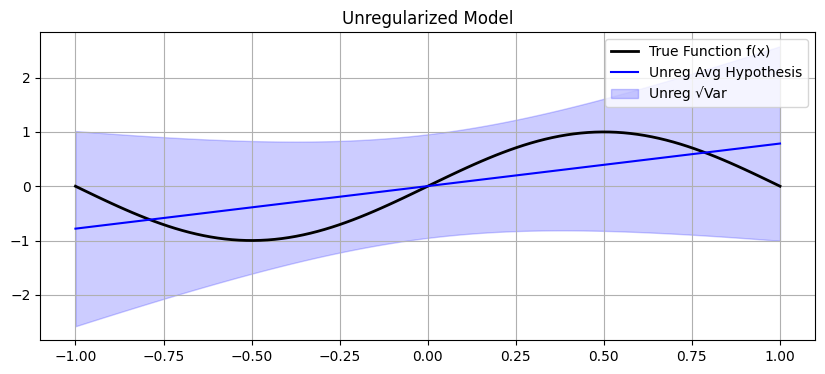

In [69]:
plt.figure(figsize=(10, 4))
plt.plot(x_g, fx, label="True Function f(x)", color='black', linewidth=2)
plt.plot(x_g, g_unr_avg, label="Unreg Avg Hypothesis", color='blue')
plt.fill_between(x_g, g_unr_avg - np.sqrt(v_unr), g_unr_avg + np.sqrt(v_unr), alpha=0.2, color='blue', label='Unreg √Var')
plt.title("Unregularized Model")
plt.legend()
plt.grid()
plt.show()

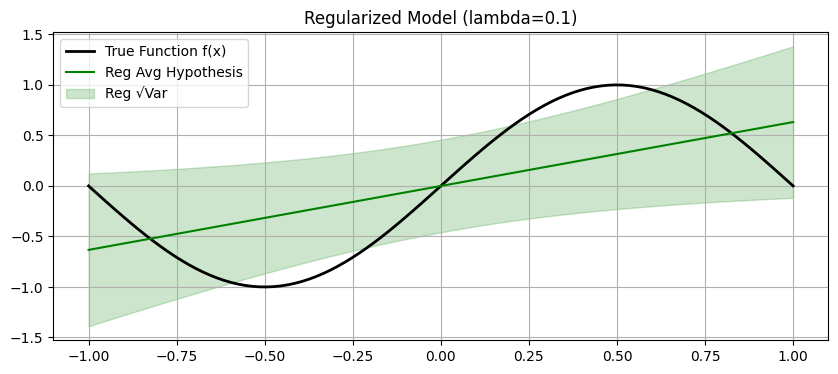

In [70]:
plt.figure(figsize=(10, 4))
plt.plot(x_g, fx, label="True Function f(x)", color='black', linewidth=2)
plt.plot(x_g, g_reg_avg, label="Reg Avg Hypothesis", color='green')
plt.fill_between(x_g, g_reg_avg - np.sqrt(v_reg), g_reg_avg + np.sqrt(v_reg), alpha=0.2, color='green', label='Reg √Var')
plt.title("Regularized Model (lambda=0.1)")
plt.legend()
plt.grid()
plt.show()

The unregularized model has a lower bias square (0.210) but a much higher variance (1.696), indicating it overfits the training data significantly. 

In contrast, the regularized model has a slightly higher bias square (0.233) but a drastically reduced variance (0.332), demonstrating improved stability and better generalization

Best K from cross-validation: 93


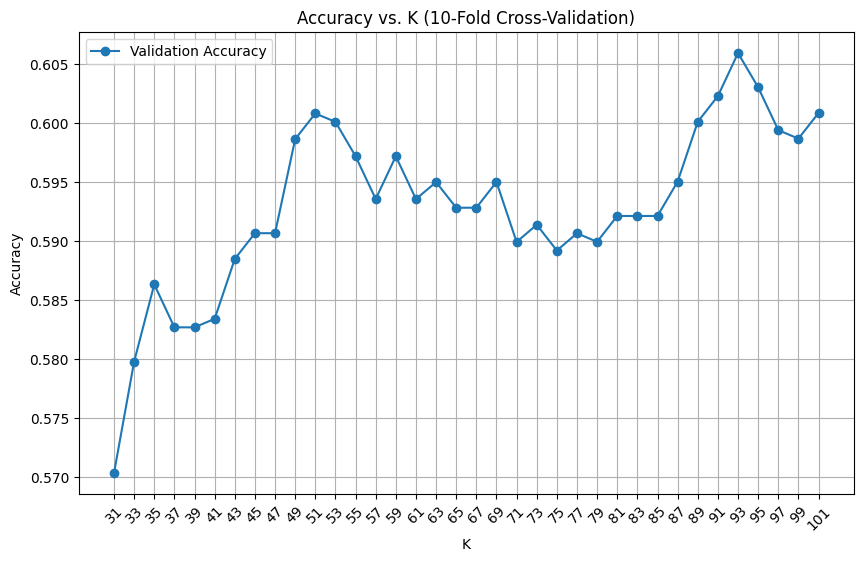

Validation Error (Best K=93): 0.394
Test Error (Best K=93): 0.424


In [83]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/5/healthcareTrain.csv')
test_data = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/5/healthcareTest.csv')

# Define features and target variable
features =  ["total_los", "num_op", "num_er", "num_ndc", "pre_total_cost", "pre_CCI"]
target = "pdc_80_flag"

X_train = train_data[features].values
y_train = train_data[target].values

X_test = test_data[features].values
y_test = test_data[target].values

# ----------------------- 1. Perform Cross-Validation -----------------------
k_values = list(range(31, 102, 2))  # Range of K values (31 to 101 with step size of 2)
cv_accuracies = []  # Store average accuracy for each K

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 10-fold cross-validation and compute mean accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_accuracies.append(scores.mean())

# Find the best value of K based on highest accuracy
best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best K from cross-validation: {best_k}")

# ----------------------- 2. Plot Accuracy vs. K -----------------------
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, marker='o', label="Validation Accuracy")
plt.title("Accuracy vs. K (10-Fold Cross-Validation)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values, rotation=45)
plt.grid()
plt.legend()
plt.show()

# ----------------------- 3. Evaluate on Test Set -----------------------
# Train the final model using the best K and the entire training set
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

# Predict on the test set
y_test_pred = final_knn.predict(X_test)

# Compute test accuracy
test_accuracy = np.mean(y_test_pred == y_test)

# Compare validation error and test error
validation_error = 1 - max(cv_accuracies)
test_error = 1 - test_accuracy

print(f"Validation Error (Best K={best_k}): {validation_error:.3f}")
print(f"Test Error (Best K={best_k}): {test_error:.3f}")
